#Rami Majadbeh
#1190611

##1. Read the dataset and examine how many features and examples does it have?

In [70]:
import pandas as pd

file="./cars.csv"

df = pd.read_csv(file)

df.shape[0]
df.shape[1]


df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [71]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


In [72]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")


Column: origin
USA       248
Asia       78
Europe     70
Name: origin, dtype: int64




##2. Are there features with missing values? How many missing values are there in each one?

In [73]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

##3.  Fill the missing values in each feature using a proper imputation method

In [143]:
df[df.isnull().all(axis=1)]

df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['origin'].fillna(df['origin'].mode()[0], inplace=True)

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

##4. Which country produces cars with better fuel economy?


<Axes: xlabel='origin', ylabel='mpg'>

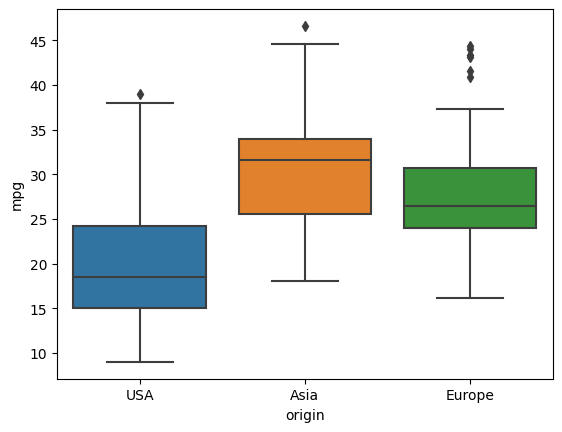

In [75]:
import seaborn as sns
sns.boxplot(x='origin', y='mpg', data=df)


**As the box plot shows, Asia has the highest mpg of the three, the median and the box are the highest of the three**

##5. Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.

##6. Support your answer for part 5 by using a quantitative measure.

In [144]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


In [76]:
Mean = df.mean()
print(f"Mean values: {Mean.values}\n")

Median = df.median()
print(f"Median values: {Median.values}\n")

Mode = df.mode().values
print(f"Mode values: {Mode}\n")

Skewness = df.skew()
print(f"Skewness values: {Skewness.values}\n")

Kurtosis = df.kurtosis()
print(f"Kurtosis values: {Kurtosis.values}\n")

Mean values: [  23.51457286    5.45477387  193.4258794   104.46938776 2970.42462312
   15.56809045   76.01005025]

Median values: [  23.     4.   148.5   95.  2803.5   15.5   76. ]

Mode values: [[13.0 4.0 97.0 150.0 1985 14.5 73.0 'USA']
 [nan nan nan nan 2130 nan nan nan]]

Skewness values: [0.45706634 0.52692155 0.71964516 1.09555248 0.53106251 0.27877684
 0.01153459]

Kurtosis values: [-0.51078127 -1.37666218 -0.74659663  0.7535091  -0.78552891  0.41949688
 -1.18123174]



<ipython-input-76-8285a58a3153>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean = df.mean()
<ipython-input-76-8285a58a3153>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Median = df.median()
<ipython-input-76-8285a58a3153>:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Skewness = df.skew()

Text(0.5, 1.0, 'Accleration, Mean=15.568090452261307\n median=15.5\n Skewness=0.27877684462588986\n Kurtosis=0.4194968829706842 ')

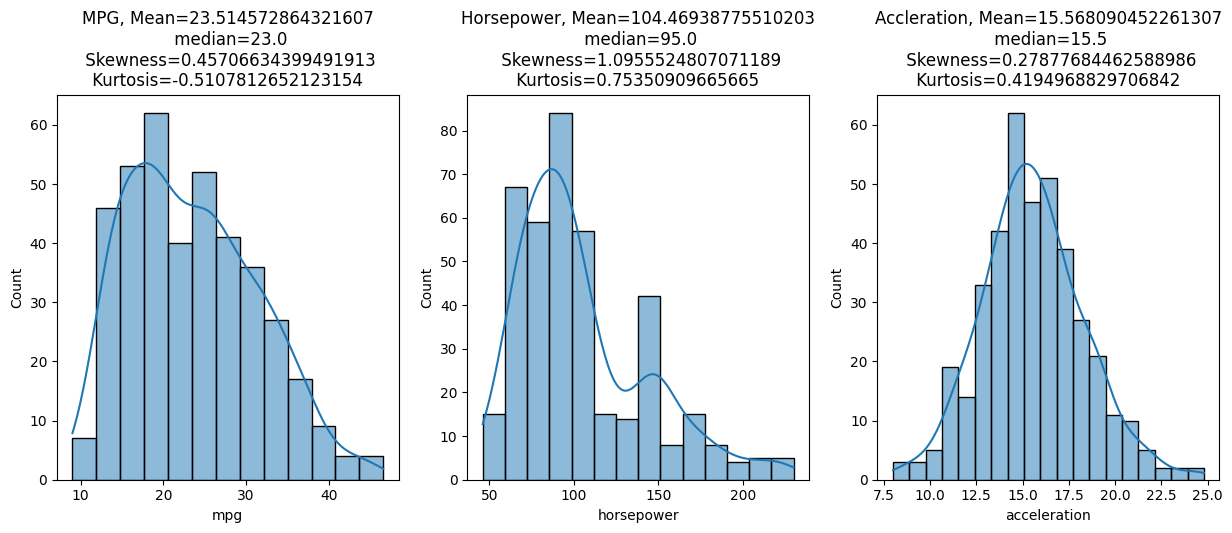

In [148]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for each feature
sns.histplot(df['mpg'], kde=True, ax=axes[0])
axes[0].set_title(f"MPG, Mean={Mean[0]}\n median={Median[0]}\n Skewness={Skewness[0]}\n Kurtosis={Kurtosis[0]} ")

sns.histplot(df['horsepower'], kde=True, ax=axes[1])
axes[1].set_title(f"Horsepower, Mean={Mean[3]}\n median={Median[3]}\n Skewness={Skewness[3]}\n Kurtosis={Kurtosis[3]} ")

sns.histplot(df['acceleration'], kde=True, ax=axes[2])
axes[2].set_title(f"Accleration, Mean={Mean[5]}\n median={Median[5]}\n Skewness={Skewness[5]}\n Kurtosis={Kurtosis[5]} ")

**The most similar to a gaussian distribution is the accleration, when looking at the skewness (asymmetry) and Kurtosis(peakedness) of the data as shown above**

##7. Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?


<Axes: xlabel='horsepower', ylabel='mpg'>

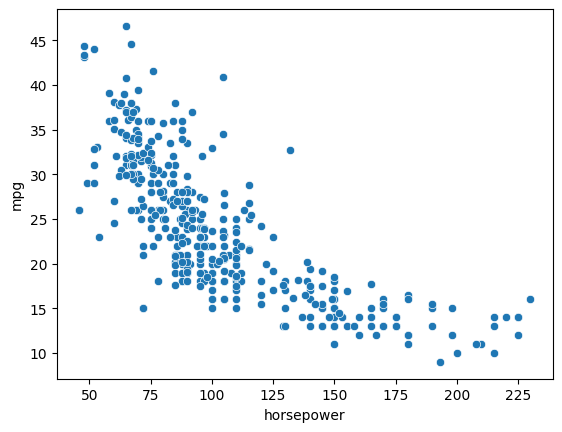

In [78]:
sns.scatterplot(x='horsepower', y='mpg', data=df)


**When the horsepower grows the mpg decreases exponentially, negative**

##8. Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7.


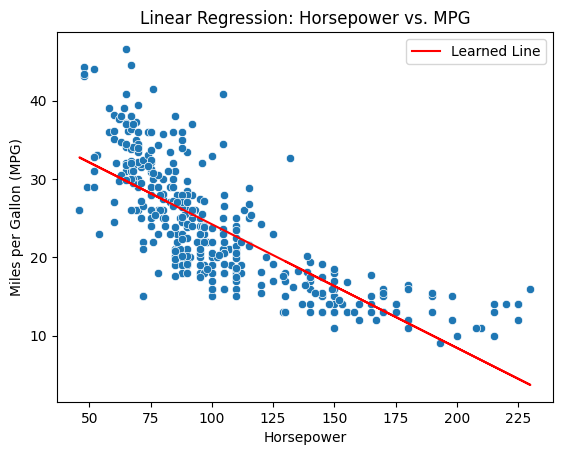

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_linear = df.copy()

#column of ones for the intercept (x0)
df_linear['intercept'] = 1

X = df_linear[['intercept', 'horsepower']].values
y = df_linear['mpg'].values

theta = np.linalg.inv(X.T @ X) @ X.T @ y

sns.scatterplot(x='horsepower', y='mpg', data=df_linear)

plt.plot(df_linear['horsepower'], X @ theta, color='red', label='Learned Line')

plt.title('Linear Regression: Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.show()


**The linear function describes a closed form linear regression solved using the equation y = slope * x + y-intercept.**


##9. Repeat part 8 but now learn a quadratic function of the formf = w0 + w1x + w2x^2


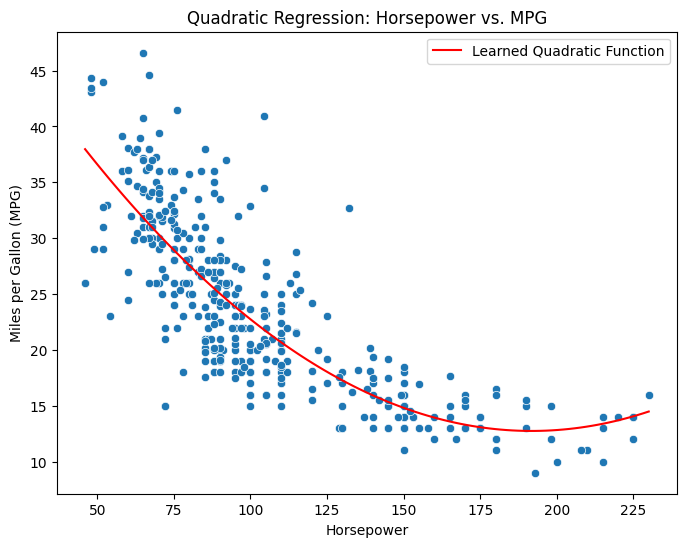

In [80]:
df_Quad = df.copy()

df_Quad['intercept'] = 1

df_Quad['horsepower_squared'] = df_Quad['horsepower'] ** 2
X = df_Quad[['intercept', 'horsepower', 'horsepower_squared']].values
y = df['mpg'].values

theta = np.linalg.inv(X.T @ X) @ X.T @ y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df_Quad)

x_values = np.linspace(df_Quad['horsepower'].min(), df_Quad['horsepower'].max(), 100)
y_values = theta[0] + theta[1] * x_values + theta[2] * x_values**2

plt.plot(x_values, y_values, color='red', label='Learned Quadratic Function')

plt.title('Quadratic Regression: Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.show()

**it is noted that the quadratic function has a higher accuracy because of the curvance and is better fitted than the linear one in part 8.**

##10. Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.

In [82]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


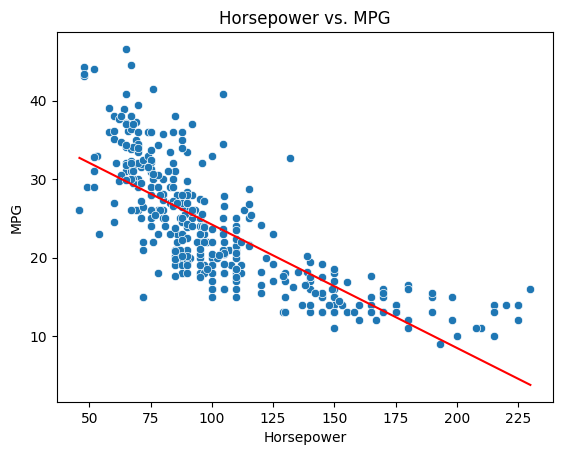

In [149]:
data = df.copy()

bias = np.ones(data['horsepower'].shape[0])
features = np.c_[bias, data['horsepower']]
target = data['mpg'].values

learningRate = 0.0001
iter = 550000

weight = np.zeros(2)
for i in range(iter):
  pred = features.dot(weight)
  error = pred - y
  grad = features.T.dot(error) / len(target)
  weight -= learningRate * grad


y_values_gd = weight[0] + weight[1] * np.array([data['horsepower'].min(), data['horsepower'].max()])

sns.scatterplot(x='horsepower', y='mpg', data=data)
plt.title('Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.plot([data['horsepower'].min(), data['horsepower'].max()], y_values_gd, color='red')

plt.show()


**we start by building the feature matrix with the bias column, then start the weights at 0, and making iteraction to figure out the y-intercept and the slope of the function, iterations and learning rate were expiremented at different values and this was found to be efficent**